In [60]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
import pandas as pd

pd.set_option("display.max_rows", 500)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Read filtered data

In [62]:
df_accounts = pd.read_csv(
    "../data/accounts_enough_history.csv", parse_dates=["update_date"]
)
df_transactions = pd.read_csv(
    "../data/transactions_enough_history.csv", parse_dates=["date"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Duplicate transactions

In [63]:
df_count_occurrences = df_transactions.groupby(
    df_transactions.columns.tolist(), as_index=False
).size()
df_count_occurrences = df_count_occurrences[df_count_occurrences["size"] > 1]
df_count_occurrences.sort_values(by="size")

,account_id,amount,date,size
24,2,-1000.00,2018-02-21,2
9756,25,-10.00,2019-01-28,2
9730,25,-11.00,2019-08-26,2
9652,25,-14.00,2019-08-26,2
9580,25,-20.00,2019-12-31,2
...,...,...,...,...
2607,8,-7.42,2020-01-06,18
2783,8,-2.73,2019-06-05,27
2744,8,-3.20,2019-06-09,37
2780,8,-2.74,2019-06-04,64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/drissdebbaghnour/.pyenv/versions/3.8.2/envs/mansa_test/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size', ylabel='Density'>

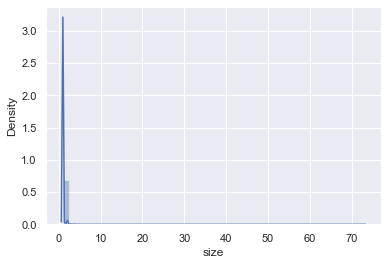

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
sns.distplot(a["size"])

- The same transactions happen at different days for the same account. It might be some regular expenses. 
- Moreover, some transactions are sometimes duplicated a lot of times. 
- They are probably not duplicates. Hence, I won't delete any of them. 
- Having the time of the transactions and some metadata about the accounts might help to understand these duplicates.

In [65]:
df_transactions[
    (df_transactions["account_id"] == 28)
    & (df_transactions["date"].isin(["2018-09-27", "2018-04-13"]))
].sort_values(by="date")

,account_id,amount,date
10778,28,-48.00,2018-04-13
10779,28,-5000.84,2018-04-13
10780,28,5000.84,2018-04-13
10493,28,-31.35,2018-09-27
10494,28,1842.50,2018-09-27
10495,28,-1842.50,2018-09-27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- The data contains sometimes expenses and incomes that happen the same day and have the exact absolute value: -5000.84 / +5000.84 or +1842.50/-1842.50.
- This might be transactions to clean:
1. Let say we expect a high expense, so we make a transfer of money to our main account to back up the expense. However, the chances that we do it the same day are very low because (usually we make a transfer before it appears in our bank account).
2. These expenses aren't seasonal, hence they are not regular expenses that can be planned in advance and for which the date is known (repayment of a loan for example).

- I guess that the objective behind predicting the income of the next month or the expenses of the next week, is to know if an account balance is positive enough to pay back a credit. Hence, having these kind of transactions that happen the same day and in a non-seasonal way might be confusing and lead to poor predictions.

- A better understanding of Mansa's business can help me understand the meaning of these transactions. They may be due to something else.

In [66]:
df_transactions[
    (df_transactions["account_id"] == 28)
    & (df_transactions["date"].isin(["2018-04-05", "2018-04-09", "2018-04-03"]))
].sort_values(by="date")

,account_id,amount,date
10800,28,-109.99,2018-04-03
10810,28,-109.99,2018-04-03
10809,28,-109.99,2018-04-03
10808,28,-35.50,2018-04-03
10807,28,-109.99,2018-04-03
10806,28,-13.80,2018-04-03
10805,28,-51.50,2018-04-03
10804,28,-26.00,2018-04-03
10803,28,-32.99,2018-04-03
10802,28,-85.83,2018-04-03


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- In the other hand there are transactions that do not happen in the same day, but show the exact pattern as mentionned before: very specific positive values taht equal to negative values: +109.99/-109.99.

- These transactions need more time to be analyzed in order to take a decision about whether to keep or remove them.

- Conclusion: I will keep them.